#### In Data augmentation from your existing training samples you try to generate  new samples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir=".",untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

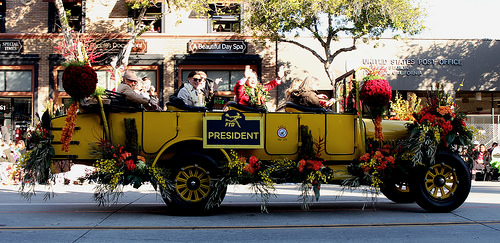

In [7]:
PIL.Image.open(str(roses[0]))

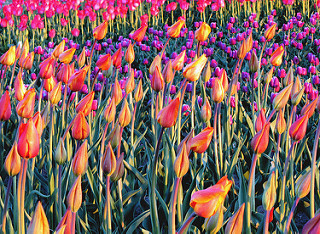

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [10]:
#Will have all file path of roses 
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [11]:
#Assigning a class number to each of the flowers 
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [14]:
#Resizing image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [51]:
#Iterating through dictionary created
x, y =[],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [52]:
y[:5]

[0, 0, 0, 0, 0]

In [53]:
x = np.array(x)
y = np.array(y)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [55]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [19]:
import splitfolders
input_folder = './datasets/flower_photos'
output_folder = './train_test_val'

split_ratio = (0.7,0.1,0.2)

splitfolders.ratio(input_folder,output= output_folder, seed = 42, ratio = split_ratio,  group_prefix =None)

Copying files: 3670 files [00:02, 1410.33 files/s]


In [20]:
train_dir = './train_test_val/train'
test_dir = './train_test_val/test'
val_dir = './train_test_val/val'
epochs = 10
batch_size = 32
input_shape = (224,224,3)

In [22]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             rotation_range = 20,
                                                             horizontal_flip = True,
                                                             zoom_range = 0.2
                                                            )
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             rotation_range = 20,
                                                             horizontal_flip = True,
                                                             vertical_flip = True,
                                                             zoom_range = 0.2
                                                            )
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             rotation_range = 20,
                                                             horizontal_flip = True,
                                                             vertical_flip = True,
                                                             zoom_range = 0.2
                                                            )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = "sparse",
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = "sparse",
    shuffle = True
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = "sparse",
    shuffle = True
)


Found 2567 images belonging to 5 classes.
Found 739 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [25]:
flr_label=['daisy','dandelion','roses','sunflower','tulips']

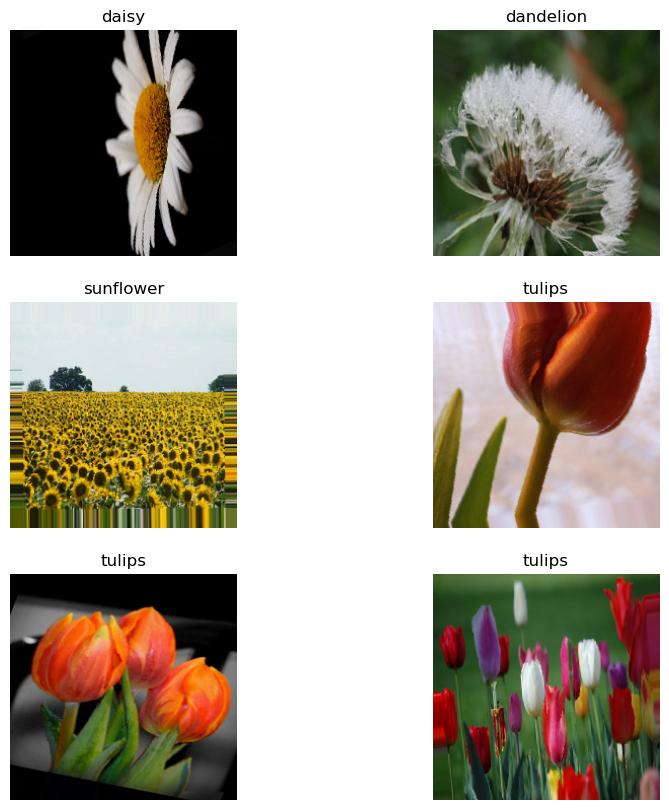

In [27]:
plt.figure(figsize=(10,10))
for images , labels in train_generator:
    for i in range(6):
        ax=plt.subplot(3,2,i+1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(flr_label[int(labels[i])])
        
    plt.show()
    break
    

In [30]:
num_classes=5

model = Sequential([
    #16,3: we have 16 filters and the size of every filter is 3,3
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #Dense layer will accept a single dimension array
    layers.Flatten(),
        layers.Dense(120,activation='relu'),
        layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history=model.fit(train_generator,validation_data=val_generator,epochs=epochs)

Epoch 1/10
81/81 [==============================] - 24s 298ms/step - loss: 1.3033 - accuracy: 0.4371 - val_loss: 1.1579 - val_accuracy: 0.5055
Epoch 2/10
81/81 [==============================] - 25s 310ms/step - loss: 1.0826 - accuracy: 0.5606 - val_loss: 1.0675 - val_accuracy: 0.5714
Epoch 3/10
81/81 [==============================] - 26s 317ms/step - loss: 0.9649 - accuracy: 0.6139 - val_loss: 1.0516 - val_accuracy: 0.5742
Epoch 4/10
81/81 [==============================] - 27s 328ms/step - loss: 0.8962 - accuracy: 0.6510 - val_loss: 1.0080 - val_accuracy: 0.5659
Epoch 5/10
81/81 [==============================] - 27s 329ms/step - loss: 0.8376 - accuracy: 0.6755 - val_loss: 0.9736 - val_accuracy: 0.6181
Epoch 6/10
81/81 [==============================] - 27s 326ms/step - loss: 0.7708 - accuracy: 0.6985 - val_loss: 0.9431 - val_accuracy: 0.6236
Epoch 7/10
81/81 [==============================] - 27s 328ms/step - loss: 0.7146 - accuracy: 0.7254 - val_loss: 0.8977 - val_accuracy: 0.6841

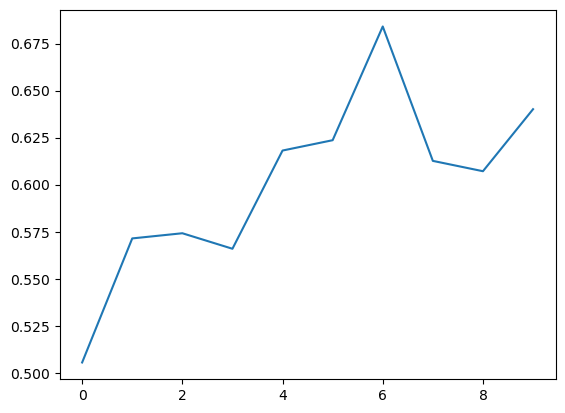

In [35]:
plt.plot(history.history['val_accuracy'])

In [37]:
model.evaluate(test_generator)

24/24 [==============================] - 5s 201ms/step - loss: 0.9314 - accuracy: 0.6306


[0.9313889145851135, 0.6305818557739258]

In [39]:
predictions = model.predict(test_generator)
predictions

24/24 [==============================] - 5s 201ms/step


array([[-2.7385888 , -5.159366  ,  4.355474  , -3.3718688 ,  5.0773816 ],
       [-0.5012655 , -1.5271971 ,  0.6586488 ,  0.61526304,  1.3192288 ],
       [-0.04857031, -1.3467497 ,  1.2206906 ,  1.8842921 ,  0.39832312],
       ...,
       [-2.1146686 , -3.3884232 ,  2.9589412 , -1.8216127 ,  3.14687   ],
       [-1.3333564 ,  1.9311781 , -3.5165226 ,  5.0931225 , -1.9418316 ],
       [-0.57911426,  1.1786679 , -0.8232094 , -3.0646987 , -0.86952627]],
      dtype=float32)

In [40]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.7127436e-04, 2.4103412e-05, 3.2682937e-01, 1.4400542e-04,
       6.7273122e-01], dtype=float32)>

In [41]:
#Gives the index of the element which is maxinum
np.argmax(score)

4

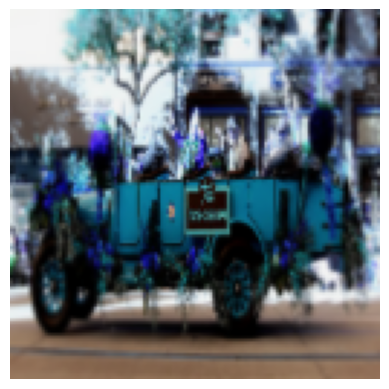

In [59]:

# Define the dimensions of your desired input shape
desired_height = 128
desired_width = 128

# Assuming 'x' is your input data with shape (3670, 180, 180, 3)
# Resize the input images to the desired shape
x_resized = tf.image.resize(x, (desired_height, desired_width))

# Create the data augmentation pipeline
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape=(desired_height, desired_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

# Apply data augmentation to the resized input
augmented_images = data_augmentation(x_resized)

# Now 'augmented_images' contains the augmented images with the expected shape (None, 128, 128, 3)

# Display an augmented image
plt.axis('off')
plt.imshow(augmented_images[0].numpy().astype("uint8"))
plt.show()



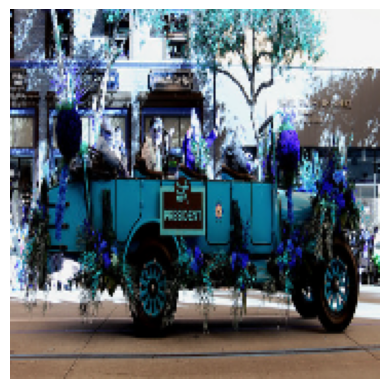

In [60]:
plt.axis('off')
plt.imshow(x[0])

In [61]:
num_classes=5

model = Sequential([
    #16,3: we have 16 filters and the size of every filter is 3,3
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #Dense layer will accept a single dimension array
    layers.Flatten(),
        layers.Dense(120,activation='relu'),
        layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 14s 157ms/step - loss: 1.4996 - accuracy: 0.3685
Epoch 2/30
86/86 [==============================] - 14s 163ms/step - loss: 1.0416 - accuracy: 0.5879
Epoch 3/30
86/86 [==============================] - 14s 157ms/step - loss: 0.8634 - accuracy: 0.6744
Epoch 4/30
86/86 [==============================] - 14s 159ms/step - loss: 0.7244 - accuracy: 0.7315
Epoch 5/30
86/86 [==============================] - 14s 160ms/step - loss: 0.5204 - accuracy: 0.8150
Epoch 6/30
86/86 [==============================] - 14s 160ms/step - loss: 0.3350 - accuracy: 0.8855
Epoch 7/30
86/86 [==============================] - 14s 168ms/step - loss: 0.1639 - accuracy: 0.9499
Epoch 8/30
86/86 [==============================] - 14s 164ms/step - loss: 0.1115 - accuracy: 0.9618
Epoch 9/30
86/86 [==============================] - 15s 170ms/step - loss: 0.0856 - accuracy: 0.9764
Epoch 10/30
86/86 [==============================] - 15s 174ms/step - loss: 0.0531 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)